In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel,ttest_ind

In [3]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
# import R's "base" package
utils = importr('utils')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
from rpy2.robjects.vectors import StrVector

packnames = ['lme4', 'optimx', 'pbkrtest', 'lmerTest',
             'ggplot2', 'dplyr', 'sjPlot', 'car']

names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [4]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr



# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjplot = importr('sjPlot')
car = importr('car')

C:\Users\dongj\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [5]:
# home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
home_dir = 'G:\My Drive\\researches\\nyu\\road-construction-local-dk\data_online_2022\\'

map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [6]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()

In [7]:
data_choice_level['undo']

0         0
1         0
2         0
3         0
4         0
         ..
113583    0
113584    0
113585    0
113586    0
113587    0
Name: undo, Length: 113588, dtype: int64

In [8]:
b = np.array(data_choice_level['undo'])
# np.sum(b==1)
print(np.where(b==1)[0][:100])

[  18   19   20   21   22   30   31   32   33   34   35   61   62  121
  122  123  124  125  126  143  144  145  146  147  237  254  271  272
  273  274  290  291  292  293  920  943  944 1008 1020 1030 1031 1032
 1060 1082 1083 1098 1099 1100 1122 1123 1124 1125 1126 1152 1153 1154
 1155 1156 1157 1158 1167 1168 1169 1170 1171 1172 1173 1197 1198 1199
 1200 1201 1226 1239 1240 1241 1242 1246 1247 1248 1253 1263 1276 1278
 1279 1280 1281 1282 1283 1805 1806 1807 1810 1811 1845 1846 1847 1848
 1849 1850]


In [9]:
a = np.array(data_choice_level['firstUndo'])
# np.sum(a==1)
print(np.where(a==1)[0][:100])
b = np.array(data_choice_level['lastUndo'])
# np.sum(a==1)
print(np.where(b==1)[0][:100])

[  18   30   61  121  143  237  254  271  290  920  943 1008 1020 1030
 1060 1082 1098 1122 1152 1167 1197 1226 1239 1246 1253 1263 1276 1278
 1805 1810 1845 1887 1945 1956 2069 2150 2917 2935 2948 3023 3825 3836
 3871 3908 3914 3927 3947 3964 3989 3996 4011 4042 4055 4069 4110 4122
 4132 4169 4689 4737 4739 4893 4916 4929 4995 5009 5031 5062 5075 5139
 5158 5164 5198 5206 5213 5275 5284 5291 5783 5805 5891 5902 5939 5950
 5960 5974 5985 5997 6008 6019 6032 6045 6058 6117 6127 6135 6167 7777
 7867 7890]
[  22   35   62  126  147  237  254  274  293  920  944 1008 1020 1032
 1060 1083 1100 1126 1158 1173 1201 1226 1242 1248 1253 1263 1276 1283
 1807 1811 1851 1887 1950 1960 2073 2155 2917 2938 2949 3024 3825 3841
 3878 3910 3920 3927 3949 3971 3992 3998 4016 4043 4061 4074 4115 4127
 4135 4172 4694 4737 4739 4897 4922 4934 5002 5014 5036 5068 5080 5144
 5158 5171 5202 5208 5215 5280 5286 5294 5787 5811 5896 5907 5946 5952
 5966 5979 5990 6002 6012 6024 6038 6050 6064 6122 6130 6138 6173

In [10]:
bool_array = np.in1d(a, b)
bool_array = np.logical_not(bool_array) 
print(bool_array)

[False False False ... False False False]


In [11]:
len(b)

113588

In [12]:
# helper functions
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

# add p-value to figure
def text(p):
    if p == 0:
        axs.text((x1+x2)*.5, y+h,  r"$p = {:.1f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    elif p < 0.001:
        axs.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize = 8)
    elif p > 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.2f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

    elif 0.01 < p < 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.3f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    else:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.4f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

## action RT

In [13]:
# choice-level all action RT
# index_start = data_choice_level.index[data_choice_level['RT'] == -1]
# RT_first_move = data_choice_level.loc[index_start+1,:]
# index_later = data_choice_level.index[(data_choice_level['RT'] != -1) & (data_choice_level['submit'] != 1)& (data_choice_level['undo'] != 1)]
# RT_later_move = data_choice_level.loc[index_later,:]
# index_submit = data_choice_level.index[data_choice_level['submit'] == 1]
# RT_submit = data_choice_level.loc[index_submit,:]

<IPython.core.display.Javascript object>


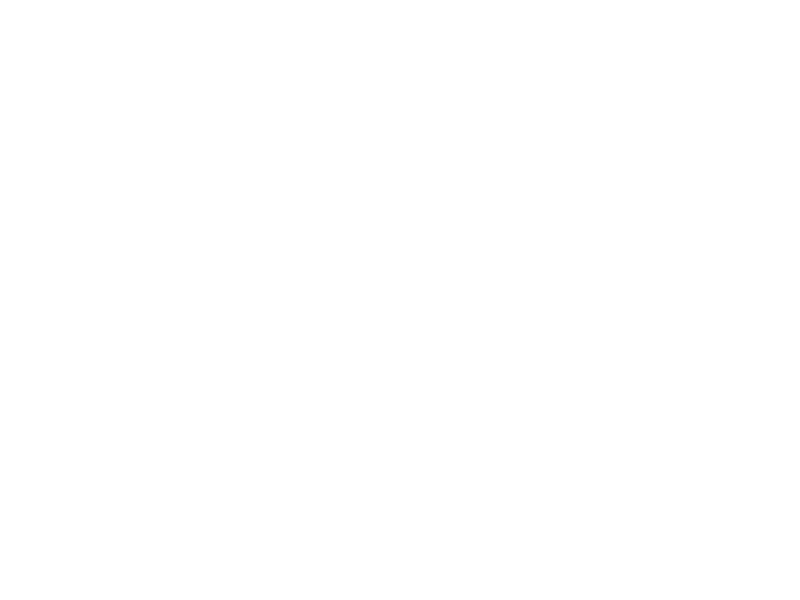

In [14]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

# df_part = df.loc[df['sub'] == subs[i],['f_t_rc','f_t_undo',
#                  'm_t_everyact_rc','m_t_everyc_undo',
#                  't_s_rc','t_s_undo']]

# undobox = []
# for x in t_everyundo[48*i:48*(i+1)]:
#     try: 
#         undobox.append(median(x))
#     except:  pass

# axs[i].plot([1,2],[f_t_rc[48*i:48*(i+1)], f_t_undo[48*i:48*(i+1)]],c = '#6a6763',linewidth=0.3) 
# axs[i].plot([2.5,3.5],[[median(x) for x in t_everyact_rc[48*i:48*(i+1)]], [median(x) for x in t_everyc_undo[48*i:48*(i+1)]]],c = '#6a6763',linewidth=0.3) 
# axs[i].plot([4,5],[t_s_rc[48*i:48*(i+1)],t_s_undo[48*i:48*(i+1)]],c = '#6a6763',linewidth=0.3) 

# plot with puzzle-level RT
bx = axs.boxplot([puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit']],
   positions =[1,2,3.5,4.5,6,7],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #
    
# normality test
# Shapiro-Wilk Test
    
# stats = [np.nan]*6
# ps = [np.nan]*6
# for s in range(len(stats)):
#     stats[s],ps[s]  = shapiro([math.log2(x) for x in df_part.iloc[:,s]])
#     print('Statistics=%.3f, p=%.3f' % (stats[s], ps[s]))
#     # interpret
#     alpha = 0.05
#     if ps[s] > alpha:
#         print('Sample looks Gaussian (fail to reject H0)')
#     else:
#         print('Sample does not look Gaussian (reject H0)')   
    
#     from scipy.stats import anderson
#     result = [np.nan]*6
#     for s in range(len(result)):
#         result[s]= anderson([math.log2(x) for x in df_part.iloc[:,s]])
#         print('Statistic: %.3f' % result[s].statistic)
#         p = 0
#         for i in range(len(result[s].critical_values)):
#         	sl, cv = result[s].significance_level[i], result[s].critical_values[i]
#         	if result[s].statistic < result[s].critical_values[i]:
#         		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
#         	else:
#         		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    
# run paired-sample t test
stat1, p1 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'])
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 3.5,4.5  
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit'])

x1, x2 = 6,7 
y, h, col = bx['caps'][11]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
stat4, p4 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'])

x1, x2 = 1,3.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p4)
#--------------------------------------
stat5, p5 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 2,4.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p5)

#--------------------------------------
axs.set_xticks([1,1.5,2, 3.5,4,4.5, 6,6.5,7])
axs.set_xticklabels(labels = ['\nwithout \nundo','first choice','\nwith \nundo','\nwithout \nundo','later choices','\nwith \nundo', '\nwithout \nundo','submit','\nwith \nundo'])#,fontsize=18

axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'action_RT.png', dpi=600, bbox_inches='tight')

## different types of undoing RT

In [15]:
index_singleUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1)&(data_choice_level['lastUndo'] == 1)]
RT_singleUndo = data_choice_level.loc[index_singleUndo,:]

index_firstUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1) &(data_choice_level['lastUndo'] != 1)]
RT_firstUndo = data_choice_level.loc[index_firstUndo,:]
index_laterUndo = data_choice_level.index[(data_choice_level['firstUndo'] != 1) & (data_choice_level['undo'] == 1)]
RT_laterUndo = data_choice_level.loc[index_laterUndo,:]

<IPython.core.display.Javascript object>


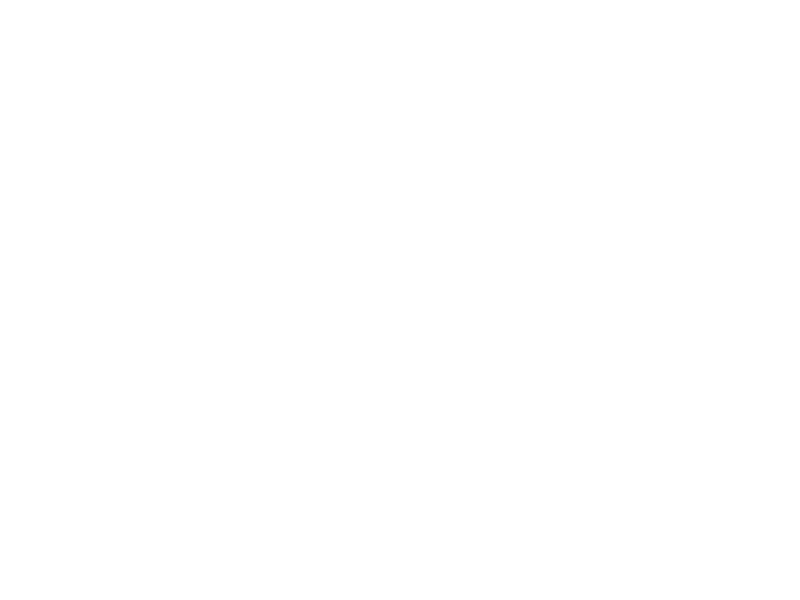

In [16]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000],
   positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,equal_var=False)
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_ind(RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 2,3 
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,3
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
axs.set_xticks([1,1.5,2,3])
axs.set_xticklabels(labels = ['\nfirst undo','sequential','\nlater undo','single undo'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')

31.63923556115462 2.1196056054293853e-181
-18.598574768787156 5.2829319023665354e-61
10.063996947789956 3.034098867216916e-23
ShapiroResult(statistic=0.44652867317199707, pvalue=0.0)
ShapiroResult(statistic=0.20164453983306885, pvalue=0.0)


C:\Users\dongj\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<IPython.core.display.Javascript object>


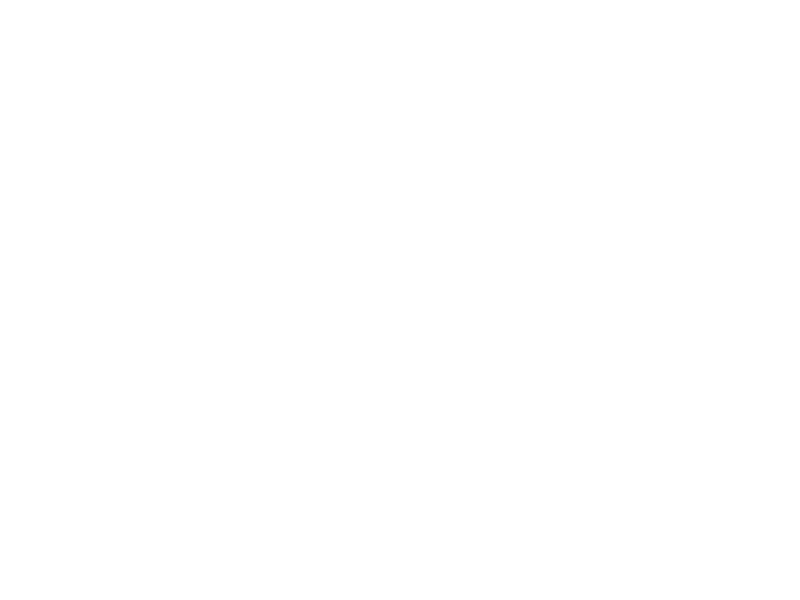

C:\Users\dongj\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


In [17]:
print(stat1, p1)
print(stat2, p2)
print(stat3, p3)


import scipy
print(scipy.stats.shapiro(RT_firstUndo['undoRT']/1000))
print(scipy.stats.shapiro(RT_laterUndo['undoRT']/1000))
import statsmodels.api as sm
import pylab as py
sm.qqplot(RT_firstUndo['undoRT']/1000, line ='45')
py.show()

<IPython.core.display.Javascript object>


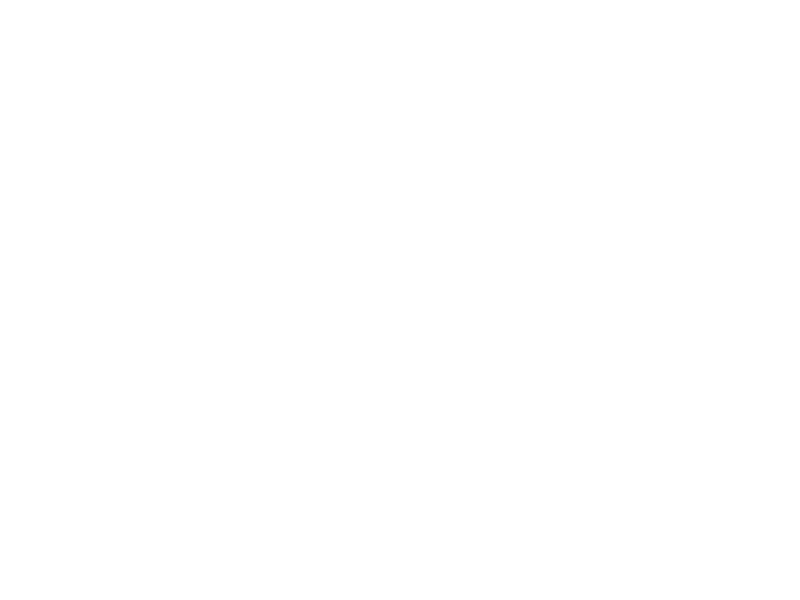

In [18]:
# flip order
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

# bx = axs.boxplot([RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000],
#    positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
#    medianprops = dict(color = 'k'))  #
bx = axs.boxplot([RT_singleUndo['undoRT']/1000, RT_firstUndo['undoRT']/1000, RT_laterUndo['undoRT']/1000],
   positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p1)

#--------------------------------------
stat3, p3 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,3
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p3)


#--------------------------------------
stat2, p2 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,equal_var=False)

x1, x2 = 2,3 
y, h, col = bx['caps'][5]._y[0] + 7, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p2)


#--------------------------------------
# axs.set_yticks([0,2,4,6,8,10])
axs.set_xticks([1,2,2.5,3])
axs.set_xticklabels(labels = ['Single undo','\nfirst ','Sequential undo','\nlater undo'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')
fig.savefig(out_dir + 'undo_RT.pdf', dpi=600, bbox_inches='tight')

In [19]:
print(stat1, p1)
print(stat2, p2)
print(stat3, p3)

-18.598574768787156 5.2829319023665354e-61
31.63923556115462 2.1196056054293853e-181
10.063996947789956 3.034098867216916e-23


## budget before submit/undo at the end of trial

In [20]:
# only undo condition
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]
index_end_undo = df_beforeUndo.index[df_beforeUndo['checkEnd'] == 1]
leftover_undo = df_beforeUndo.loc[index_end_undo,'leftover']

index_notundo = data_choice_level.index[(data_choice_level['undo'] == 0)&(data_choice_level['RT'] != -1)]
df_notbeforeUndo = data_choice_level.loc[index_notundo-1,:]
index_end_notundo = df_notbeforeUndo.index[(df_notbeforeUndo['checkEnd'] == 1)&(df_notbeforeUndo['condition'] == 1)]
leftover_notundo = df_notbeforeUndo.loc[index_end_notundo,'leftover']

<IPython.core.display.Javascript object>


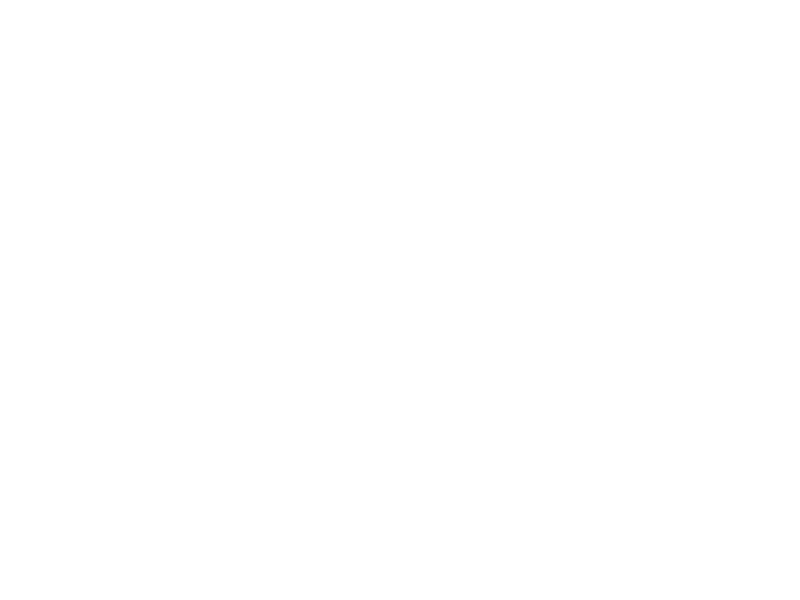

In [21]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([leftover_undo,leftover_notundo],
   positions =[1,2],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(leftover_undo,leftover_notundo,equal_var=False)
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['budget before undo','budget before submit'])#,fontsize=18

axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('budget') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'budget_before_submit_undo.png', dpi=600, bbox_inches='tight')

### counts of errors before undo (by accumulated severity)

In [22]:
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]

MAS_trial = df_beforeUndo['allMAS']
accu_severity_error = MAS_trial - df_beforeUndo['currMas']
groupby_error = accu_severity_error.value_counts()
print(groupby_error/sum(groupby_error))

1    0.468289
0    0.231932
2    0.212758
3    0.062684
4    0.022493
5    0.001475
6    0.000369
dtype: float64


<IPython.core.display.Javascript object>


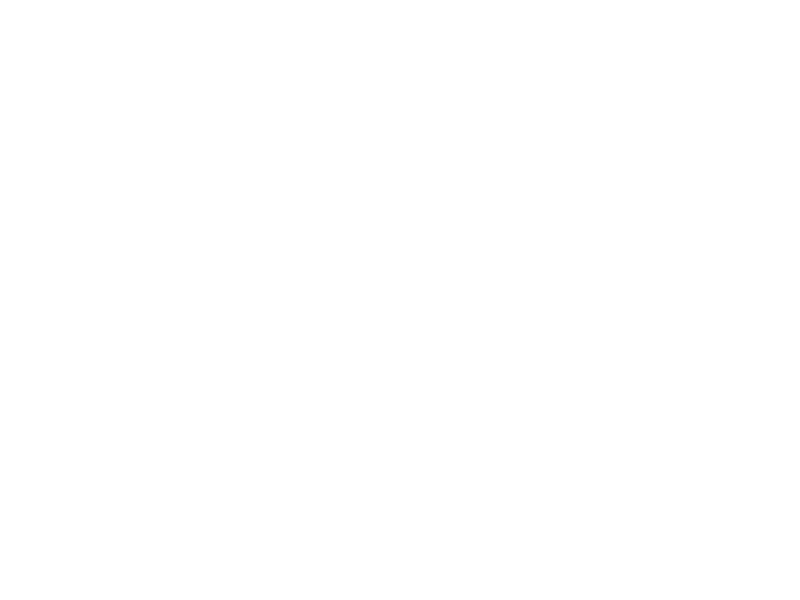

In [23]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar(groupby_error.index,groupby_error/sum(groupby_error))
axs.set_ylabel('proportion of first undo')
axs.set_xlabel('accumulated error before first undo action')
plt.show()
fig.savefig(out_dir + 'undo_accumulated_error.pdf', dpi=600, bbox_inches='tight')

In [24]:
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]

instant_severity_error = df_beforeUndo['severityOfErrors']
groupby_error_instant = instant_severity_error.value_counts()
print(groupby_error_instant)

0    2377
1     272
2      44
3      16
4       2
6       1
Name: severityOfErrors, dtype: int64


<IPython.core.display.Javascript object>


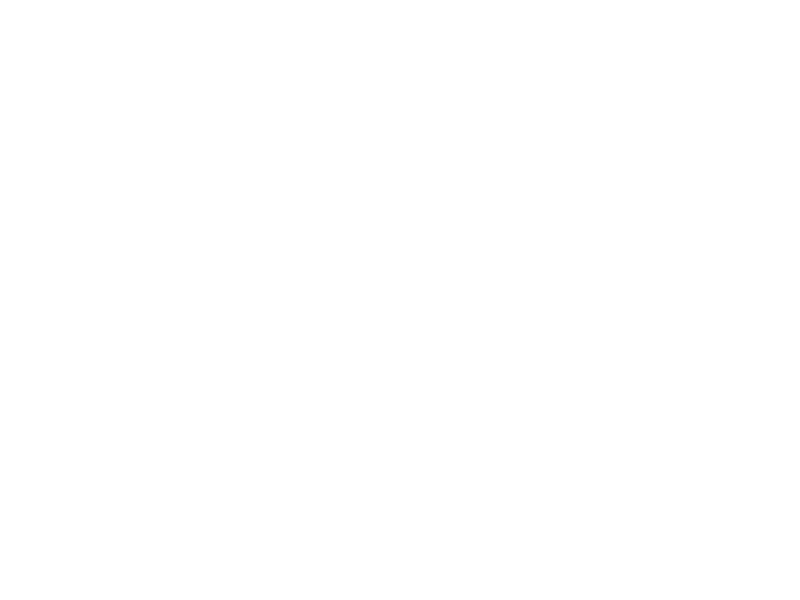

In [25]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar(groupby_error_instant.index,groupby_error_instant/sum(groupby_error_instant))
axs.set_ylabel('proportion of first undo')
axs.set_xlabel('instant error before first undo action')
plt.show()
fig.savefig(out_dir + 'undo_instant_error.pdf', dpi=600, bbox_inches='tight')

### conditional probability version of two figures above,

In [26]:
# FROM EACH SUBJECT
dat_subjects = []
for i in np.unique(np.array(data_choice_level['subjects'])):
    temp_data = []
    index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]
    
    puzzle_error = data_choice_level['allMAS'] - data_choice_level['currMas']
    
    # no error
    index_error = puzzle_error.index[puzzle_error == 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))


    # YES error
    index_error = puzzle_error.index[puzzle_error > 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))
    
    dat_subjects.append(temp_data)

dat_subjects = np.array(dat_subjects)
print(np.mean(dat_subjects,axis=0))

[0.04206835 0.14604288]


In [27]:
np.where(np.array(puzzle_error==-1))


(array([69723, 69724, 69725, 69726, 69727, 69728, 69729, 69730, 69731,
        69732], dtype=int64),)

<IPython.core.display.Javascript object>


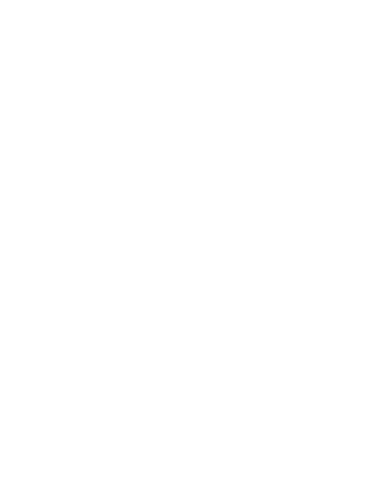

-7.785701172735922
3.6598216275072363e-13


Text(0.5, 1.0, 'p=3.6598216275072363e-13')

In [28]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],np.mean(dat_subjects,axis = 0),color=[.7,.7,.7], edgecolor = 'k', yerr=np.std(dat_subjects,axis = 0)/np.sqrt(dat_subjects.shape[0]))
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_yticks(np.linspace(0,0.16,5))
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
axs.set_xlabel('puzzle-level')
axs.set_ylim([0,0.16])
plt.show()
fig.savefig(out_dir + 'conditional_undo_masError.pdf', dpi=600, bbox_inches='tight')

from scipy.stats import ttest_ind
stat1, p1 = ttest_ind(dat_subjects[:,0], dat_subjects[:,1])
print(stat1)
print(p1)
axs.set_title('p=' + str(p1))


In [29]:
import scipy
scipy.stats.shapiro(dat_subjects[:,1])


ShapiroResult(statistic=0.9206022620201111, pvalue=1.3831817341269925e-05)

In [48]:
data_choice_level.index[data_choice_level['firstUndo']==1]

Int64Index([    18,     30,     61,    121,    143,    237,    254,    271,
               290,    920,
            ...
            112209, 112215, 112224, 112234, 112248, 112288, 112341, 112388,
            112397, 112418],
           dtype='int64', length=2712)

In [74]:
np.unique(data_choice_level['undo'])

array([0, 1], dtype=int64)

In [141]:
undo_index = data_choice_level.index[data_choice_level['undo']==1]
print(undo_index)

Int64Index([    18,     19,     20,     21,     22,     30,     31,     32,
                33,     34,
            ...
            112398, 112399, 112400, 112401, 112402, 112418, 112419, 112420,
            112421, 112422],
           dtype='int64', length=11786)


In [155]:

index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] == 0]
index_error = np.array(index_error)
index_error += 1

if np.any(index_error>(data_choice_level.shape[0]-1)):
    index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    
print(index_error[:40])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 18 19 20 21 22 23 24 25 26 28
 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45]


In [161]:
index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] != 0]
index_error +=1
print(index_error[:40])

Int64Index([ 15,  16,  17,  27,  37,  79,  86, 120, 139, 157, 178, 194, 242,
            254, 258, 268, 287, 303, 312, 313, 314, 318, 362, 381, 383, 402,
            442, 447, 460, 468, 477, 481, 508, 524, 591, 602, 655, 659, 694,
            697],
           dtype='int64')


In [162]:
print(np.intersect1d(undo_index, index_error))

[   254    920   1008   1020   1060   1082   1197   1263   1810   2150
   2917   3947   4122   5284   5291   6127   7867   8163   8183   8562
   8617   8743   8745   8770   8858   9332   9355   9409   9544   9719
   9768  10463  10767  11130  12068  12165  12357  12381  12393  12428
  12440  12923  13063  13073  13161  13211  13248  13261  13273  13316
  13388  13390  13506  13575  14087  14139  14353  14412  15438  16217
  16232  16365  16398  16750  17402  17457  17601  17996  18048  18072
  18158  18202  18412  18459  18531  19533  19557  19638  19709  19949
  20247  20272  20311  20980  20998  21283  22288  22508  23468  23483
  24107  25423  25431  25660  27270  29698  29750  29930  30890  30933
  31049  31999  33055  33065  33067  33105  33187  33342  33386  33470
  33749  33836  33971  34104  34803  34827  35212  35869  36227  36350
  36430  36458  36461  36618  36623  36816  36824  36939  37588  37657
  37744  37803  38933  38939  39044  39736  40047  40363  41127  41159
  4130

In [163]:
np.unique(data_choice_level['undo'][index_error+1])

array([0, 1], dtype=int64)

In [164]:
data_choice_level[14:17]

,subjects,puzzleID,trialID,allMAS,currNumCities,currMas,currNos,leftover,within_reach,condition,undo,firstUndo,lastUndo,submit,checkEnd,severityOfErrors,error,RT,undoRT,tortuosity
14,0,28,1,9,3,8,2,209.741647,20,1,0,0,0,0,0,1,1,1648.0,-1.0,1.670306
15,0,28,1,9,4,7,1,157.244029,10,1,0,0,0,0,0,1,1,2201.0,-1.0,1.437659
16,0,28,1,9,5,6,2,88.738554,2,1,0,0,0,0,0,1,1,1142.0,-1.0,1.269324


In [165]:
undo_after_error = data_choice_level['undo'][index_error]
print(undo_after_error)
undofirst_after_error = data_choice_level['firstUndo'][index_error]
print(undofirst_after_error)

15        0
16        0
17        0
27        0
37        0
         ..
113514    0
113520    0
113552    0
113564    0
113581    0
Name: undo, Length: 7559, dtype: int64
15        0
16        0
17        0
27        0
37        0
         ..
113514    0
113520    0
113552    0
113564    0
113581    0
Name: firstUndo, Length: 7559, dtype: int64


In [166]:
np.where(undo_after_error != undofirst_after_error)

(array([], dtype=int64),)

In [119]:
undo_after_error[14:30]

18    1
19    1
20    1
21    1
22    1
23    0
24    0
25    0
26    0
28    0
29    0
30    1
31    1
32    1
33    1
34    1
Name: undo, dtype: int64

In [118]:
undofirst_after_error[14:30]

18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
28    0
29    0
30    1
31    0
32    0
33    0
34    0
Name: firstUndo, dtype: int64

In [104]:
data_choice_level.keys()

Index(['subjects', 'puzzleID', 'trialID', 'allMAS', 'currNumCities', 'currMas',
       'currNos', 'leftover', 'within_reach', 'condition', 'undo', 'firstUndo',
       'lastUndo', 'submit', 'checkEnd', 'severityOfErrors', 'error', 'RT',
       'undoRT', 'tortuosity'],
      dtype='object')

In [108]:
# FROM EACH SUBJECT
dat_subjects = []
for i in np.unique(np.array(data_choice_level['subjects'])):
    temp_data = []
    index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]
    
    # no error
    index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] == 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    len(index_error)
#     temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))


    # YES error
    index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] != 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
#     print()
#     temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))
    temp_data.append(np.mean(data_choice_level['undo'][index_error]))
    
    dat_subjects.append(temp_data)
#     print(temp_data)

dat_subjects = np.array(dat_subjects)

<IPython.core.display.Javascript object>


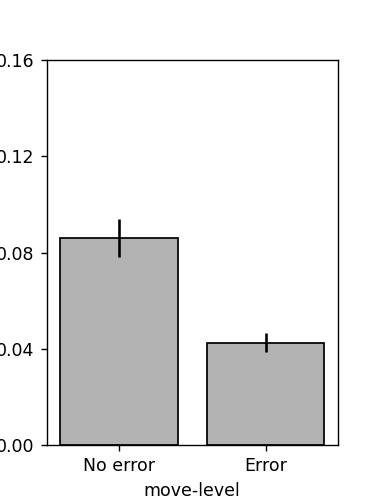

In [109]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],np.mean(dat_subjects,axis = 0),color=[.7,.7,.7], edgecolor = 'k', yerr=np.std(dat_subjects,axis = 0)/np.sqrt(dat_subjects.shape[0]))
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
axs.set_xlabel('move-level')
axs.set_ylim([0,0.16])
axs.set_yticks([0, 0.04, 0.08, 0.12, 0.16])
plt.show()
fig.savefig(out_dir + 'conditional_pundo_givenError.pdf', dpi=600, bbox_inches='tight')

<IPython.core.display.Javascript object>


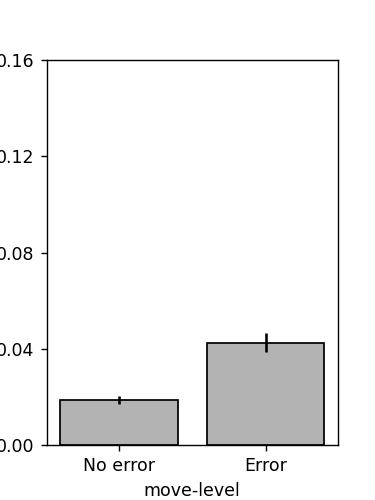

In [107]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],np.mean(dat_subjects,axis = 0),color=[.7,.7,.7], edgecolor = 'k', yerr=np.std(dat_subjects,axis = 0)/np.sqrt(dat_subjects.shape[0]))
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
axs.set_xlabel('move-level')
axs.set_ylim([0,0.16])
axs.set_yticks([0, 0.04, 0.08, 0.12, 0.16])
plt.show()
fig.savefig(out_dir + 'conditional_pundo_givenError.pdf', dpi=600, bbox_inches='tight')

4.914966453546378
1.8456446684763362e-06


<IPython.core.display.Javascript object>


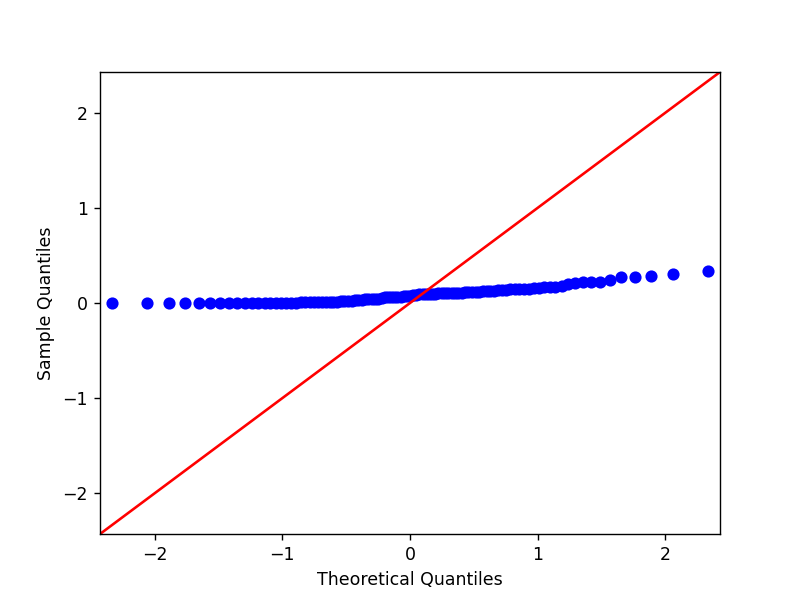

C:\Users\dongj\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


In [32]:
ttest_ind
stat1, p1 = ttest_ind(dat_subjects[:,0], dat_subjects[:,1])
print(stat1)
print(p1)
import statsmodels.api as sm
import pylab as py
sm.qqplot(dat_subjects[:,0], line ='45')
py.show()

In [35]:
import scipy
scipy.stats.shapiro(dat_subjects[:,1])

ShapiroResult(statistic=0.8958092927932739, pvalue=8.130836590680701e-07)

## Conditional probabiltiy of undoing once and sequences

#### For undoing once.

In [36]:
i = 0 
temp_undo = np.zeros(data_choice_level['firstUndo'].shape)
temp_data = []
index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]

puzzle_error = data_choice_level['allMAS'] - data_choice_level['currMas']

# no error
index_error = puzzle_error.index[puzzle_error == 0]
index_error = np.array(index_error)
index_error = np.intersect1d(index_error, index_subjects)
index_error += 1
if np.any(index_error>(data_choice_level.shape[0]-1)):
    index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
#     index_error = np.intersect1d(index_error, np.array(data_choice_level.index[data_choice_level['lastUndo'] == data_choice_level['firstUndo']]))
#     temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(np.array(data_choice_level['undo'])[index_error]))


In [37]:
LU_UNDO = np.where(data_choice_level['lastUndo']==1)[0]
HU_UNDO = np.where(data_choice_level['firstUndo']==1)[0]
print(np.intersect1d(LU_UNDO, HU_UNDO))

[   237    254    920   1008   1020   1060   1226   1253   1263   1276
   1887   2917   3825   3927   4737   4739   5158   7777   7867   7890
   7946   8183   8509   8600   8615   8686   8741   8743   8745   8763
   8801   8858   9332   9355   9409   9544   9719   9768   9986  10624
  10757  10767  11130  11156  11233  12055  12139  12158  12165  12185
  12202  12239  12266  12291  12293  12299  12312  12357  12363  12365
  12381  12393  12405  12428  12921  12923  13063  13073  13083  13091
  13128  13138  13161  13174  13187  13199  13211  13248  13261  13273
  13316  13388  13575  14087  14412  15475  16200  16232  16398  16511
  17457  17601  17934  18101  18202  18459  18477  18531  18576  18618
  18726  19261  19453  19471  19533  19557  19644  19837  19900  19905
  20247  20261  20311  20980  20998  21105  22115  22253  22255  22288
  22369  22508  23360  23468  23483  24107  24114  24614  25660  26249
  27270  28753  29737  29948  29966  29968  29984  30072  30890  30933
  3199

In [65]:

    temp_undo[np.intersect1d(LU_UNDO, HU_UNDO)] = 1

In [38]:

temp_undo = np.zeros(data_choice_level['firstUndo'].shape)
temp_data = []
index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]

puzzle_error = data_choice_level['allMAS'] - data_choice_level['currMas']

# no error
index_error = puzzle_error.index[puzzle_error == 0]
index_error = np.array(index_error)
index_error = np.intersect1d(index_error, index_subjects)
index_error += 1
if np.any(index_error>(data_choice_level.shape[0]-1)):
    index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))

#     temp_data.append(np.mean(data_choice_level['undo'][index_error])
LU_UNDO = np.where(data_choice_level['lastUndo']==1)[0]
HU_UNDO = np.where(data_choice_level['firstUndo']==1)[0]
temp_undo[np.intersect1d(LU_UNDO, HU_UNDO)] = 1

temp_undo[np.array(data_choice_level.index[data_choice_level['lastUndo'] == data_choice_level['firstUndo']])] = 1
temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))


In [40]:
temp_undo

array([1., 1., 1., ..., 1., 1., 1.])

In [41]:
# FROM EACH SUBJECT
dat_subjects = []
for i in np.unique(np.array(data_choice_level['subjects'])):
    temp_undo = np.zeros(data_choice_level['firstUndo'].shape)
    temp_data = []
    index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]
    
    puzzle_error = data_choice_level['allMAS'] - data_choice_level['currMas']
    
    # no error
    index_error = puzzle_error.index[puzzle_error == 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))

    #     temp_data.append(np.mean(data_choice_level['undo'][index_error])
    LU_UNDO = np.where(data_choice_level['lastUndo']==1)[0]
    HU_UNDO = np.where(data_choice_level['firstUndo']==1)[0]
    temp_undo[np.intersect1d(LU_UNDO, HU_UNDO)] = 1

    temp_undo[np.array(data_choice_level.index[data_choice_level['lastUndo'] == data_choice_level['firstUndo']])] = 1
    temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))


    # YES error
    index_error = puzzle_error.index[puzzle_error > 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    index_error = np.intersect1d(index_error, np.array(data_choice_level.index[data_choice_level['lastUndo'] == data_choice_level['firstUndo']]))
#     temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(np.array(data_choice_level['undo'])[index_error]))
    temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))
    dat_subjects.append(temp_data)

dat_subjects = np.array(dat_subjects)
print(np.mean(dat_subjects,axis=0))

[0.00742693 0.00908946]


In [68]:
np.array(data_choice_level.index[data_choice_level['lastUndo'] == data_choice_level['firstUndo']])

array([     0,      1,      2, ..., 113585, 113586, 113587], dtype=int64)

<IPython.core.display.Javascript object>


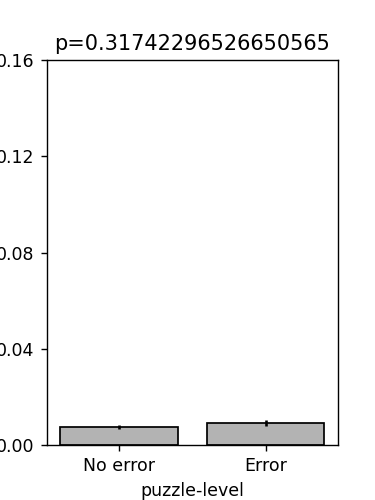

-1.0022727405217402
0.31742296526650565


Text(0.5, 1.0, 'p=0.31742296526650565')

In [42]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],np.mean(dat_subjects,axis = 0),color=[.7,.7,.7], edgecolor = 'k', yerr=np.std(dat_subjects,axis = 0)/np.sqrt(dat_subjects.shape[0]))
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_yticks(np.linspace(0,0.16,5))
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
axs.set_xlabel('puzzle-level')
axs.set_ylim([0,0.16])
plt.show()
# fig.savefig(out_dir + 'conditional_undo_masError.pdf', dpi=600, bbox_inches='tight')

from scipy.stats import ttest_ind
stat1, p1 = ttest_ind(dat_subjects[:,0], dat_subjects[:,1])
print(stat1)
print(p1)
axs.set_title('p=' + str(p1))


#### Undoing sequentially

In [70]:
# FROM EACH SUBJECT
dat_subjects = []
for i in np.unique(np.array(data_choice_level['subjects'])):
    temp_data = []
    index_subjects =  data_choice_level.index[data_choice_level['subjects'] == i]
    
    puzzle_error = data_choice_level['allMAS'] - data_choice_level['currMas']
    
    # no error
    index_error = puzzle_error.index[puzzle_error == 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    LU_INDEX = data_choice_level.index[data_choice_level['lastUndo']==1] 
    FU_INDEX= data_choice_level.index[data_choice_level['firstUndo']==1]
    index_error = np.intersect1d(index_error, FU_INDEX[LU_INDEX!=FU_INDEX])
#     temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(np.array(data_choice_level['undo'])[index_error]))
    temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))


    # YES error
    index_error = puzzle_error.index[puzzle_error > 0]
    index_error = np.array(index_error)
    index_error = np.intersect1d(index_error, index_subjects)
    index_error += 1
    if np.any(index_error>(data_choice_level.shape[0]-1)):
        index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
    LU_INDEX = data_choice_level.index[data_choice_level['lastUndo']==1] 
    FU_INDEX= data_choice_level.index[data_choice_level['firstUndo']==1]
    index_error = np.intersect1d(index_error, FU_INDEX[LU_INDEX!=FU_INDEX])
#     index_error = np.intersect1d(index_error, np.array(data_choice_level.index[data_choice_level['lastUndo'] != data_choice_level['firstUndo']]))
#     temp_data.append(np.mean(data_choice_level['undo'][index_error]))
#     temp_data.append(np.mean(np.array(data_choice_level['undo'])[index_error]))
    temp_data.append(np.mean(data_choice_level['firstUndo'][index_error]))
    dat_subjects.append(temp_data)

dat_subjects = np.array(dat_subjects)
# print(np.mean(dat_subjects,axis=0)))
# print(dat_subjects)

In [71]:
index_error = np.intersect1d(index_error, FU_INDEX[LU_INDEX!=FU_INDEX])

In [72]:
print(index_error)
print(FU_INDEX[LU_INDEX!=FU_INDEX])
print(np.intersect1d(index_error, FU_INDEX[LU_INDEX!=FU_INDEX]))

[]
Int64Index([    18,     30,     61,    121,    143,    271,    290,    943,
              1030,   1082,
            ...
            112158, 112178, 112209, 112215, 112224, 112234, 112288, 112388,
            112397, 112418],
           dtype='int64', length=2143)
[]


In [73]:
np.unique(data_choice_level['lastUndo'])

array([0, 1], dtype=int64)

## Conditional probabiltiy in the group level

In [74]:
# FROM ALL SUBJECTS

data_choice_level['severityOfErrors']
dat = []

# no error
index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] == 0]
index_error += 1
index_error = np.array(index_error)
if np.any(index_error>(data_choice_level.shape[0]-1)):
    index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
# dat.append(np.mean(data_choice_level['undo'][index_error]))
dat.append(np.mean(data_choice_level['firstUndo'][index_error]))


# YES error
index_error = data_choice_level['severityOfErrors'].index[data_choice_level['severityOfErrors'] != 0]
index_error += 1
index_error = np.array(index_error)
if np.any(index_error>(data_choice_level.shape[0]-1)):
    index_error = np.delete(index_error, np.where(index_error>(data_choice_level.shape[0]-1)))
# dat.append(np.mean(data_choice_level['undo'][index_error]))
dat.append(np.mean(data_choice_level['firstUndo'][index_error]))

In [75]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],dat,color=[.7,.7,.7], edgecolor = 'k')
axs.set_ylabel('P (undo)')
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['No error', 'Error'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
plt.show()
fig.savefig(out_dir + 'conditional_pundo_givenError.pdf', dpi=600, bbox_inches='tight')



<IPython.core.display.Javascript object>

## number of undoing presses and sequences 

In [76]:
np.unique(np.array(single_condition_data['numFullUndo'][single_condition_data['numUNDO']!=0]))
undo_once_count_sub = single_condition_data.groupby(['subjects'])['numUNDO'].mean()
undo_once_sequences = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()
print(undo_once_count_sub)


subjects
1      0.804348
2      1.652174
3      0.239130
4      0.195652
5      2.021739
         ...   
97     3.913043
98     0.065217
99     5.347826
100    2.695652
101    0.000000
Name: numUNDO, Length: 101, dtype: float64


In [77]:
print(single_condition_data.groupby(['subjects'])['numFullUndo'].mean())
print(single_condition_data.groupby(['subjects'])['numUNDO'].mean())

subjects
1      0.239130
2      0.500000
3      0.043478
4      0.086957
5      0.456522
         ...   
97     0.717391
98     0.065217
99     1.152174
100    0.565217
101    0.000000
Name: numFullUndo, Length: 101, dtype: float64
subjects
1      0.804348
2      1.652174
3      0.239130
4      0.195652
5      2.021739
         ...   
97     3.913043
98     0.065217
99     5.347826
100    2.695652
101    0.000000
Name: numUNDO, Length: 101, dtype: float64


In [78]:
undo_presses = np.array(single_condition_data.groupby(['subjects'])['numUNDO'].mean())
undo_length  = np.array(single_condition_data.groupby(['subjects'])['numUNDO'].mean())/np.array(single_condition_data.groupby(['subjects'])['numFullUndo'].mean())

undo_length[np.isnan(undo_length)] = 0
print(undo_presses)
print(undo_length)

[ 0.80434783  1.65217391  0.23913043  0.19565217  2.02173913  4.39130435
  0.          0.08695652  7.58695652  3.5         2.54347826  4.19565217
  1.30434783  0.41304348  4.13043478  2.30434783 14.82608696  3.7173913
  2.60869565  0.02173913  0.15217391  2.34782609  2.91304348  0.84782609
  0.          2.2173913   2.56521739  0.80434783  0.76086957 11.60869565
  1.67391304  8.82608696  2.41304348  1.41304348  2.39130435  4.30434783
  0.76086957  0.19565217 18.04347826  3.02173913 10.82608696  0.04347826
  0.          2.7826087   1.47826087  2.7173913   1.36956522  0.
  0.2826087   3.32608696  1.54347826  0.02173913  2.36956522  0.2173913
  0.          3.7826087  11.36956522  0.63043478  0.02173913  0.13043478
  6.04347826  0.26086957  4.80434783  1.15217391  0.          3.2173913
  0.13043478  0.54347826  0.          3.2173913   0.43478261  0.02173913
  0.91304348  7.86956522  3.26086957  6.7826087   1.82608696  2.84782609
  0.13043478  2.32608696  7.19565217  2.47826087  0.          

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [79]:
fig1, ax1 = plt.subplots()
# ax1.plot(undo_count_sub,undo_benefit_sub,'o',s=2,c='k')
ax1.scatter(undo_presses,undo_length,10,c='k')

ax1.set_xlabel('Average number of pressing undo buttons')
ax1.set_ylabel('Average number of undoing in a sequence')
fig1.savefig(out_dir + 'undo_num_length.png', dpi=600, bbox_inches='tight')
fig1.savefig(out_dir + 'undo_num_length.pdf', dpi=600, bbox_inches='tight')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


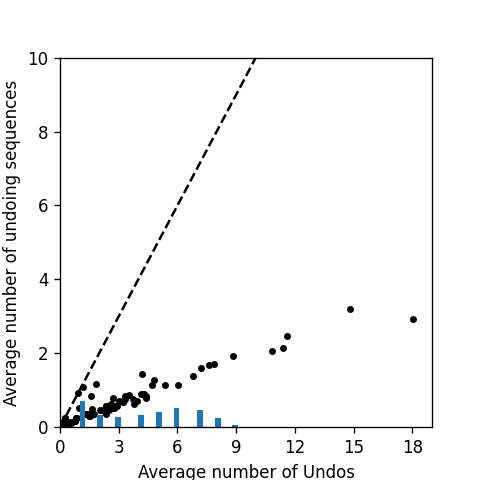

In [84]:
fig1, ax1 = plt.subplots()
ax1.plot([0,12],[0,12],'--',c='k')
ax1.scatter(undo_presses,undo_once_sequences,10,c='k')
ax1.set_xlim(0,19)
ax1.set_xticks(np.linspace(0,18,7).astype(np.int16))
ax1.set_ylim(0,10)

fig1.set_figwidth(4)
fig1.set_figheight(4)

ax1.set_xlabel('Average number of Undos')
ax1.set_ylabel('Average number of undoing sequences')
fig1.savefig(out_dir + 'undo_num_seq.png', dpi=600, bbox_inches='tight')
fig1.savefig(out_dir + 'undo_num_seq.pdf', dpi=600, bbox_inches='tight')



In [85]:
from scipy.stats import spearmanr, pearsonr
# spearmanr(undo_presses,undo_length)
pearsonr(undo_presses,undo_length)

(0.5406400285553867, 5.346199630208349e-09)

In [96]:
num_undos

array([5, 6, 2, ..., 5, 6, 5], dtype=int64)

<IPython.core.display.Javascript object>


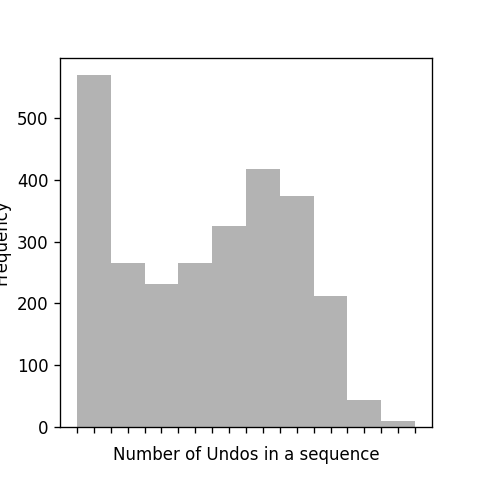

In [95]:
fig, axs = plt.subplots(1, 1)
axs.hist(num_undos, bins=10,color=[.7,.7,.7])
plt.ylabel('Frequency')
plt.xlabel('Number of Undos in a sequence')
axs.set_xticks(np.linspace(1,10,21))
axs.set_xticklabels('')

fig.set_figwidth(4)
fig.set_figheight(4)
fig.savefig(out_dir + 'undo_num_seq.png', dpi=600, bbox_inches='tight')
fig.savefig(out_dir + 'undo_num_seq.pdf', dpi=600, bbox_inches='tight')


In [ ]:
# histogram of number of undos in a sequence
num_undos = np.array(data_choice_level.index[data_choice_level['lastUndo']==1]) - np.array(data_choice_level.index[data_choice_level['firstUndo']==1]) + 1

%matplotlib notebook


fig, axs = plt.subplots(1, 1)
axs.bar(groupby_error.index,groupby_error/sum(groupby_error))
axs.set_ylabel('proportion of first undo')
axs.set_xlabel('accumulated error before first undo action')



fig.set_figwidth(4)
fig.set_figheight(4)
plt.show()
fig.savefig(out_dir + 'number_of_undos_in_the_sequence.pdf', dpi=600, bbox_inches='tight')

## benefit of undo - number of full undoing

In [ ]:
basic_score = puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'].reset_index(drop=True)
basic_score_z = basic_score/puzzleID_order_data[puzzleID_order_data['condition']==0]['mas'].reset_index(drop=True)
single_condition_data['numCities_z'] = single_condition_data['numCities']/single_condition_data['mas']

single_condition_data['undo_benefit'] = single_condition_data['numCities'] - basic_score
single_condition_data['undo_benefit_z'] = single_condition_data['numCities_z'] - basic_score_z

undo_benefit_sub = single_condition_data.groupby(['subjects'])['undo_benefit'].mean()
undo_count_sub = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()
undo_once_count_sub = single_condition_data.groupby(['subjects'])['numUNDO'].mean()

In [ ]:
benefit_undo = (np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities']) 
        - np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities']))

undo_count = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numFullUndo'])

yerr = stats.binned_statistic(undo_count, benefit_undo, statistic=lambda y: np.std(y)/np.sqrt(len(y)), bins=[0,1,2,3,4,100])
bins = stats.binned_statistic(undo_count, benefit_undo, 'mean', bins=[0,1,2,3,4,100])

In [ ]:
fig, axs = plt.subplots()         
axs.plot(bins[1][:-1], bins[0], color = '#81b29a', linewidth=3)
plotline1, caplines1, barlinecols1 = axs.errorbar(bins[1][:-1], bins[0], yerr[0], capsize = 0, ls='None', color='k')

# non-parametric version of anova (because number of observations is different: https://www.reneshbedre.com/blog/anova.html)
# Kruskal-Wallis Test
stat1, p1 = stats.kruskal(benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 1,4  
y, h, col = bins[0][1] + 0.1, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

stat2, p2 = stats.kruskal(benefit_undo[undo_count==0], benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 0,4  
y, h, col = bins[0][1] + 0.05, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

axs.set_xticks([0,1,2,3,4])
axs.set_xticklabels([0,1,2,3,'4+'])
axs.set_xlabel('number of full undoing')
axs.set_ylabel('benefit of undo (n_undo - n_basic)')
fig.savefig(out_dir + 'undobenefit_undonum.png', dpi=600, bbox_inches='tight')

In [ ]:
scatter_data = single_condition_data.groupby(['undo_benefit','numFullUndo'])['index'].size().to_frame(name = 'count').reset_index()

In [ ]:
scatter_data['count']

In [ ]:
# %matplotlib notebook
# fig1, ax1 = plt.subplots()
# sns.scatterplot(scatter_data['numFullUndo'], scatter_data['undo_benefit'], size = scatter_data['count'], sizes = (3,100), data=scatter_data) 
# ax1.set_xlabel("number of undo")
# ax1.set_ylabel("benefit of undo")

In [ ]:
undo_puzzle = single_condition_data[single_condition_data['numUNDO']>0].groupby(['subjects']).size()
count = [len(single_condition_data.groupby(['subjects']).size())]
for i in range(1,47):
    count.append(sum(undo_puzzle>=i))

In [ ]:
fig, axs = plt.subplots()

plt.bar(list(range(0,47)),count)
axs.set_xlabel("undo in >= number of puzzles")
axs.set_ylabel("number of subjects")
# axs.plot(bins[1][:-1], bins[0], color = '#81b29a', linewidth=3)

In [ ]:
order = single_condition_data.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

%matplotlib notebook
fig, axs = plt.subplots(1, 1)

bx = sns.barplot(x='puzzleID', y='numFullUndo', data = single_condition_data, color = '#ccd5ae',order=sort_order.index) 


In [ ]:
#TODO: with a caption stating that each point is a subject, the Spearman rho, and the p-value
fig1, ax1 = plt.subplots()
# ax1.plot(undo_count_sub,undo_benefit_sub,'o',s=2,c='k')
ax1.scatter(undo_count_sub,undo_benefit_sub,10,c='k')
ax1.set_xlabel("Average number of undos")
ax1.set_ylabel("Benefit of undo")
fig1.savefig(out_dir + 'benefit_undo.pdf', dpi=600, bbox_inches='tight')




In [ ]:
#TODO: with a caption stating that each point is a subject, the Spearman rho, and the p-value
fig1, ax1 = plt.subplots()
# ax1.plot(undo_count_sub,undo_benefit_sub,'o',s=2,c='k')
ax1.scatter(undo_once_count_sub,undo_benefit_sub,10,c='k')
ax1.set_xlabel("Average number of undos undoonce")
ax1.set_ylabel("Benefit of undo")
fig1.savefig(out_dir + 'benefit_undo_one.pdf', dpi=600, bbox_inches='tight')




In [ ]:
out_dir

In [ ]:
# one rho per person

import scipy

rhos = []

for i in range(101):
    singlesub_porder = puzzleID_order_data[puzzleID_order_data['subjects'] == i].copy()
    
    
    wundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==1]['numCities'])
    woundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==0]['numCities'])
    
    undo_benefit = wundo_nct - woundo_nct
    num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numFullUndo'])
#     num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numUNDO'])
    
    
    coeff, p = scipy.stats.spearmanr(undo_benefit, num_undo)
    RR = np.corrcoef(undo_benefit, num_undo)    
    
    print('-'*20)
    print(coeff)
    print(p)
#     print(RR[0,1])
    if not np.isnan(coeff):
        rhos.append(coeff)
#         rhos.append(RR[0,1])
        

In [ ]:
# one rho per puzzle

import scipy

rhos = []

for i in range(45):
    singlesub_porder = puzzleID_order_data[puzzleID_order_data['puzzleID'] == i].copy()
    
    
    wundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==1]['numCities'])
    woundo_nct = np.array(singlesub_porder[singlesub_porder['condition']==0]['numCities'])
    
    undo_benefit = wundo_nct - woundo_nct
    num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numFullUndo'])
#     num_undo = np.array(singlesub_porder[singlesub_porder['condition']==1]['numUNDO'])
    
    
    coeff, p = scipy.stats.spearmanr(undo_benefit, num_undo)
    RR = np.corrcoef(undo_benefit, num_undo)    
    
    print('-'*20)
    print(coeff)
    print(p)
#     print(RR[0,1])
    if not np.isnan(coeff):
        rhos.append(coeff)
#         rhos.append(RR[0,1])
        

In [ ]:
wundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities'])
woundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'])

undo_benefit = wundo_nct - woundo_nct


data_ = {'puzzleID':puzzleID_order_data['puzzleID'][puzzleID_order_data['condition']==1].tolist(), 
         'subjects':puzzleID_order_data['subjects'][puzzleID_order_data['condition']==1].tolist(), 
         'benefitUndo':undo_benefit.tolist(),
         'numUNDO':puzzleID_order_data['numUNDO'][puzzleID_order_data['condition']==1].tolist(), 
         'numFullUndo':puzzleID_order_data['numFullUndo'][puzzleID_order_data['condition']==1].tolist()  }


import pandas as pd

# Calling DataFrame constructor on list
df = pd.DataFrame(data_)
print(df)



<IPython.core.display.Javascript object>


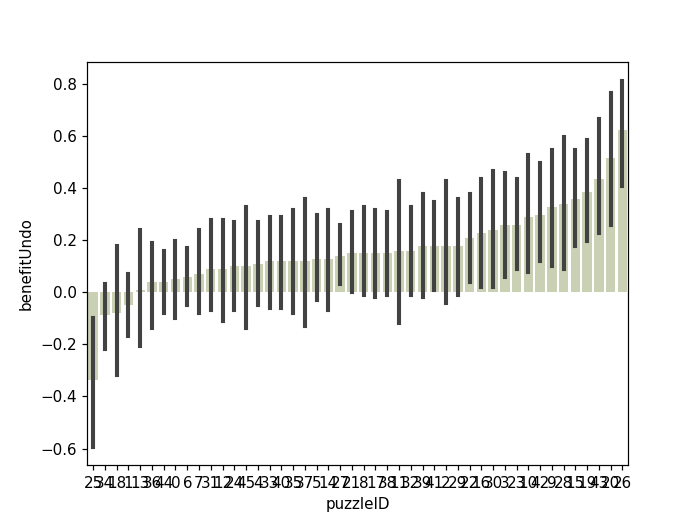

In [358]:
# bar plot for showing benefit of undo for each puzzle
order = single_condition_data.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

order2 = df.groupby(['puzzleID'])['benefitUndo'].mean().to_frame()
sort_order2 = order2.sort_values('benefitUndo')

%matplotlib notebook
fig, axs = plt.subplots(1, 1)

# bx = sns.barplot(ax = axs[0],x='puzzleID', y='numFullUndo', data = single_condition_data, color = '#ccd5ae',order=sort_order.index) 
bx = sns.barplot(x='puzzleID', y='benefitUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 



<IPython.core.display.Javascript object>


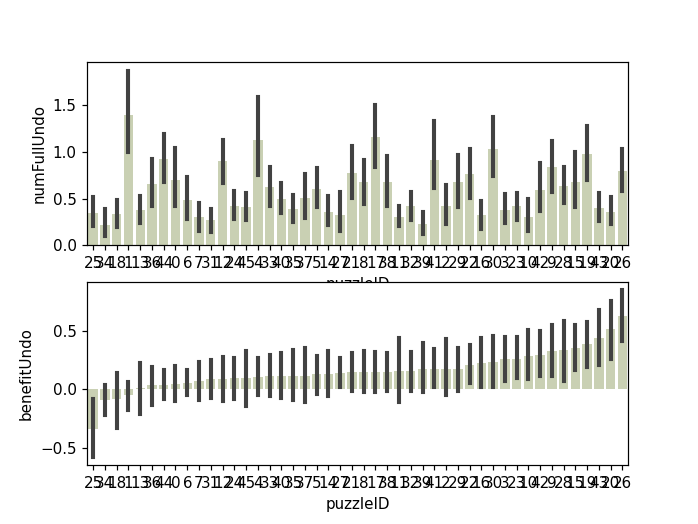

In [388]:
# bar plot for showing benefit of undo for each puzzle
order = df.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

order2 = df.groupby(['puzzleID'])['benefitUndo'].mean().to_frame()
sort_order2 = order2.sort_values('benefitUndo')

%matplotlib notebook
fig, axs = plt.subplots(2, 1)

bx = sns.barplot(ax = axs[0],x='puzzleID', y='numFullUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 
bx = sns.barplot(ax = axs[1], x='puzzleID', y='benefitUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 



In [395]:
iis = []

for i in range(46):
    a = np.array(df['benefitUndo'][df['puzzleID']==i])[sort_order2.index]
    b = np.zeros(np.array(df['benefitUndo'][df['puzzleID']==0]).shape)
    stat,p = ttest_ind(a,b)
    if p < 0.05:
        iis.append(i)
        print(i)

8
9
10
11
12
15
16
17
19
20
22
23
24
26
28
29
31
32
38
41
43


In [469]:
puzzleID = []
subjects = []
benefitUndo=[]
numUNDO = []
numFullUndo = []

wundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities'])
woundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'])
undo_benefit = wundo_nct - woundo_nct

for i in iis:
    puzzleData = puzzleID_order_data[puzzleID_order_data['puzzleID']==i].copy()

    wundo_nct = np.array(puzzleData[puzzleData['condition']==1]['numCities'])
    woundo_nct = np.array(puzzleData[puzzleData['condition']==0]['numCities'])  
    
    undo_benefit = wundo_nct - woundo_nct
    puzzleID.extend(puzzleData[puzzleID_order_data['condition']==1]['puzzleID'].tolist())
    benefitUndo.extend(undo_benefit)
    subjects.extend(puzzleData[puzzleID_order_data['condition']==1]['subjects'].tolist())
    numUNDO.extend(puzzleData[puzzleID_order_data['condition']==1]['numUNDO'].tolist())
    numFullUndo.extend(puzzleData[puzzleID_order_data['condition']==1]['numFullUndo'].tolist())
    
data_ = {'puzzleID':puzzleID, 
         'subjects':subjects, 
         'benefitUndo':benefitUndo,
         'numUNDO':numUNDO, 
         'numFullUndo':numFullUndo }


import pandas as pd

# Calling DataFrame constructor on list
df = pd.DataFrame(data_)
print(df)


      puzzleID  subjects  benefitUndo  numUNDO  numFullUndo
0            8         1            0        6            1
1            8         2            0        0            0
2            8         3            0        0            0
3            8         4            1        0            0
4            8         5           -1       11            3
...        ...       ...          ...      ...          ...
2116        43        97            0        0            0
2117        43        98            0        1            1
2118        43        99            1        0            0
2119        43       100            1        0            0
2120        43       101            0        0            0

[2121 rows x 5 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<IPython.core.display.Javascript object>


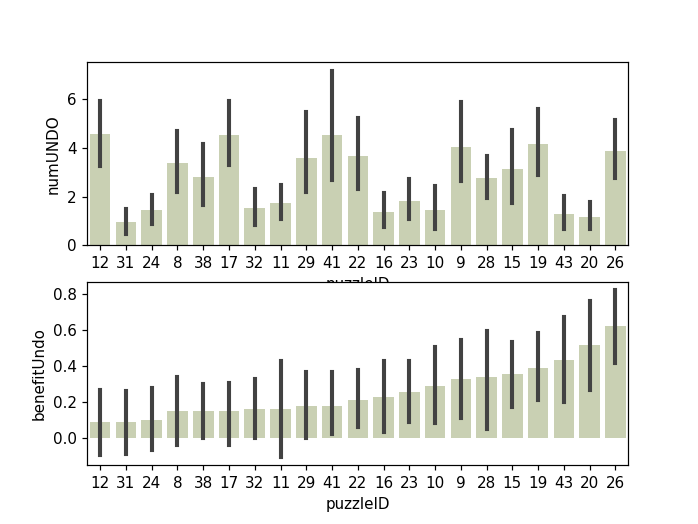

In [471]:
# bar plot for showing benefit of undo for each puzzle
order = df.groupby(['puzzleID'])['numFullUndo'].mean().to_frame()
sort_order = order.sort_values('numFullUndo')

order2 = df.groupby(['puzzleID'])['benefitUndo'].mean().to_frame()
sort_order2 = order2.sort_values('benefitUndo')

%matplotlib notebook
fig, axs = plt.subplots(2, 1)

# bx = sns.barplot(ax = axs[0],x='puzzleID', y='numFullUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 
bx = sns.barplot(ax = axs[0],x='puzzleID', y='numUNDO', data = df, color = '#ccd5ae',order=sort_order2.index) 
bx = sns.barplot(ax = axs[1], x='puzzleID', y='benefitUndo', data = df, color = '#ccd5ae',order=sort_order2.index) 

In [484]:
rhos = []
for i in range(101):
    puzzleData = puzzleID_order_data[puzzleID_order_data['subjects']==i].copy()

    wundo_nct = np.array(puzzleData[puzzleData['condition']==1]['numCities'])
    woundo_nct = np.array(puzzleData[puzzleData['condition']==0]['numCities'])  
    
    undo_benefit = wundo_nct - woundo_nct

    coeff, p = scipy.stats.spearmanr(undo_benefit, puzzleData[puzzleData['condition']==1]['numUNDO'])
#     RR = np.corrcoef(undo_benefit, num_undo)    
    
    print('-'*20)
    print(coeff)
    print(p)
#     print(RR[0,1])
    if not np.isnan(coeff):
        rhos.append(coeff)

--------------------
nan
nan
--------------------
0.3631651257424391
0.013113840681134107
--------------------
-0.35755351832042637
0.014705341717949462
--------------------
0.15093076481592993
0.3167102795787435
--------------------
-0.2593813223557233
0.08173171257542174
--------------------
0.03799967148567463
0.8020274704483785
--------------------
0.21882599780793668
0.14399354875537723
--------------------
nan
nan
--------------------
-0.047455908226752566
0.7541436651962741
--------------------
0.08102841178512041
0.592429447309653
--------------------
0.25580244888231596
0.08618617965157778
--------------------
0.06072533928328276
0.6884974070402098
--------------------
-0.012013120240372856
0.9368437572457067
--------------------
0.15469053013808887
0.3046636067901064
--------------------
0.32964829440052057
0.025273505335402936
--------------------
0.2296132352158897
0.12477263777389118
--------------------
0.32256578549304604
0.02878996816508644
--------------------
0.018015

In [481]:
p

0.2112488066630932

In [482]:
h,p = ttest_ind(np.array(rhos),np.zeros(np.array(rhos).shape))

<IPython.core.display.Javascript object>


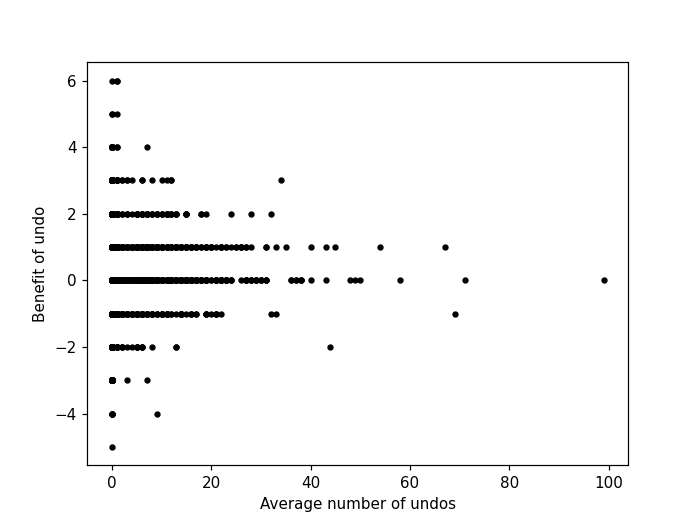

In [187]:
wundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities'])
woundo_nct = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'])

undo_benefit = wundo_nct - woundo_nct
num_undo = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numUNDO'])



fig1, ax1 = plt.subplots()
# ax1.plot(undo_count_sub,undo_benefit_sub,'o',s=2,c='k')
ax1.scatter(num_undo,undo_benefit,10,c='k')
ax1.set_xlabel("Average number of undos")
ax1.set_ylabel("Benefit of undo")
fig.savefig(out_dir + 'benefit_undo_tot.pdf', dpi=600, bbox_inches='tight')


In [36]:
# one rho per person
undo_benefit_sub = single_condition_data.groupby(['subjects'])['undo_benefit'].mean()
undo_count_sub = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()



# spearman rho for individuals
import scipy
fig1, ax1 = plt.subplots()



subjects
1      0.239130
2      0.500000
3      0.043478
4      0.086957
5      0.456522
         ...   
97     0.717391
98     0.065217
99     1.152174
100    0.565217
101    0.000000
Name: numFullUndo, Length: 101, dtype: float64

<IPython.core.display.Javascript object>


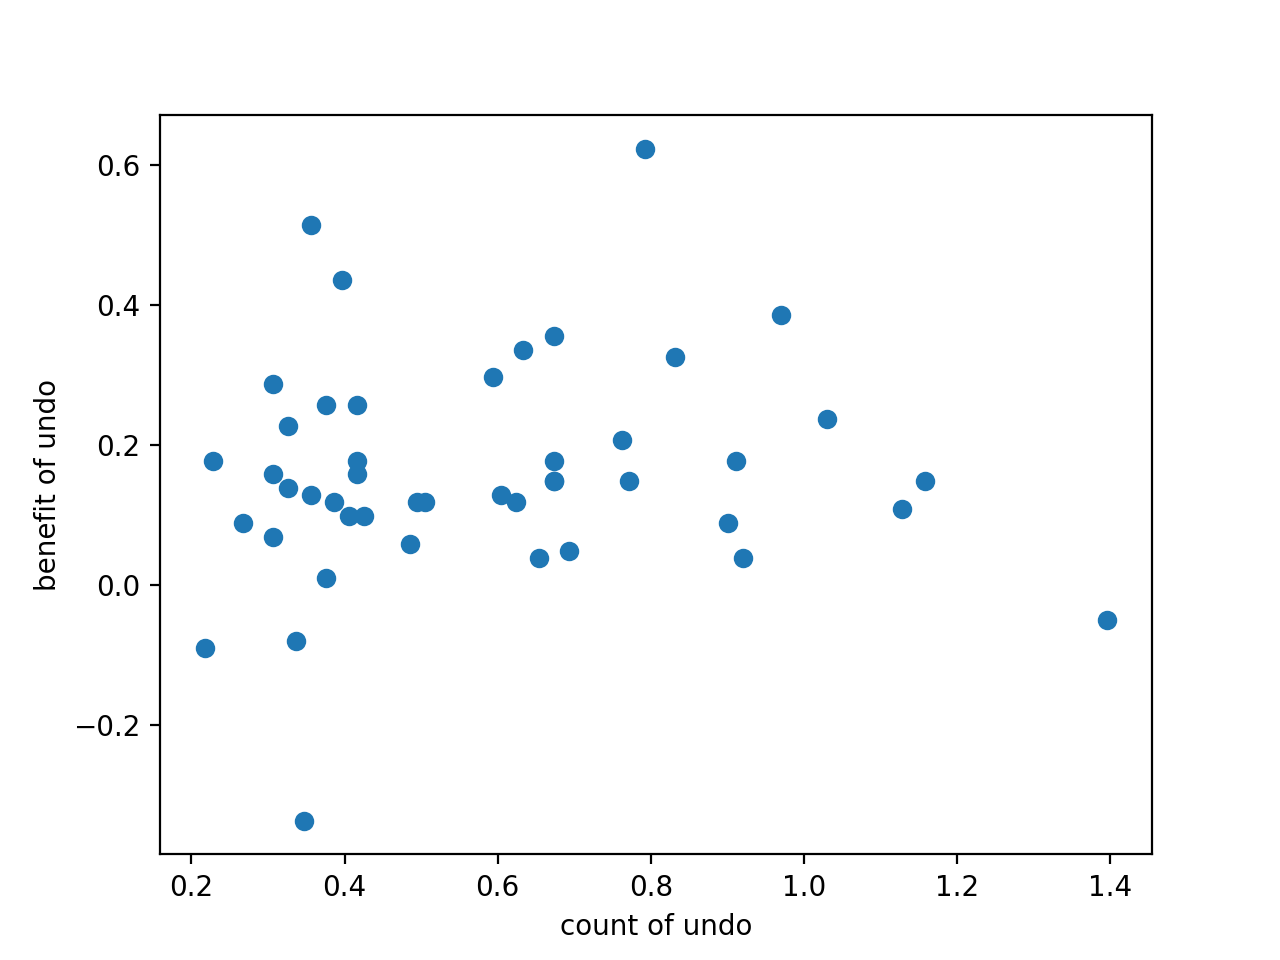

Text(0, 0.5, 'benefit of undo')

In [18]:
undo_benefit_puzzle = single_condition_data.groupby(['puzzleID'])['undo_benefit'].mean()
undo_count_puzzle = single_condition_data.groupby(['puzzleID'])['numFullUndo'].mean()
fig1, ax1 = plt.subplots()
ax1.plot(undo_count_puzzle,undo_benefit_puzzle,'o')
ax1.set_xlabel("average number of undo")
ax1.set_ylabel("benefit of undo")

In [59]:
%%R -i single_condition_data

single_condition_data$subjects <- factor(single_condition_data$subjects)
single_condition_data$puzzleID <- factor(single_condition_data$puzzleID)
# single_condition_data$numFullUndo[single_condition_data$numFullUndo >4] <- 4
# single_condition_data$numFullUndo <- factor(single_condition_data$numFullUndo)

str(single_condition_data)

'data.frame':	4646 obs. of  23 variables:
 $ index            : int  14 17 90 87 77 85 13 70 78 5 ...
 $ subjects         : Factor w/ 101 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ puzzleID         : Factor w/ 46 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ reward           : int  81 49 100 81 81 81 100 81 81 100 ...
 $ numCities        : int  9 7 10 9 9 9 10 9 9 10 ...
 $ mas              : int  9 7 10 10 10 9 10 9 9 10 ...
 $ nos              : int  104 6 70 34 4 5 180 3 10 2 ...
 $ leftover         : num  12.88 20.82 24.61 4.92 3.42 ...
 $ numError         : int  1 3 0 1 1 0 0 0 0 0 ...
 $ sumSeverityErrors: int  1 3 0 1 1 0 0 0 0 0 ...
 $ condition        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ numUNDO          : int  6 11 7 0 0 0 0 0 0 0 ...
 $ numFullUndo      : int  1 3 1 0 0 0 0 0 0 0 ...
 $ numEnd           : int  2 4 2 1 1 1 1 1 1 1 ...
 $ TT               : num  48.6 62.3 56.5 20.5 17.3 ...
 $ RT1              : num  6.99 12.95 5.71 6.92 3.96 ...
 $ RTlater   

In [60]:
%%R

model = lmer(undo_benefit_z ~ numFullUndo + (numFullUndo|subjects) + (numFullUndo|puzzleID),
                                  data=single_condition_data , control=lmerControl(optimizer="optimx",
                                                                   optCtrl=list(method="nlminb")))

# get the coefficients for the best fitting model
summary(model)

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
undo_benefit_z ~ numFullUndo + (numFullUndo | subjects) + (numFullUndo |  
    puzzleID)
   Data: single_condition_data
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: -7745.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9312 -0.2597 -0.1207  0.6837  5.2023 

Random effects:
 Groups   Name        Variance  Std.Dev.  Corr
 subjects (Intercept) 0.000e+00 0.0000000     
          numFullUndo 4.385e-05 0.0066223  NaN
 puzzleID (Intercept) 1.804e-04 0.0134331     
          numFullUndo 3.024e-07 0.0005499 1.00
 Residual             1.084e-02 0.1041335     
Number of obs: 4646, groups:  subjects, 101; puzzleID, 46

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  0.014493   0.002623 46.311252   5.526 1.45e-06 ***
numFullUndo  0.005099   0.001725  5.460095   2.956   0.0284 *  

1204 1209 
1205 1210 


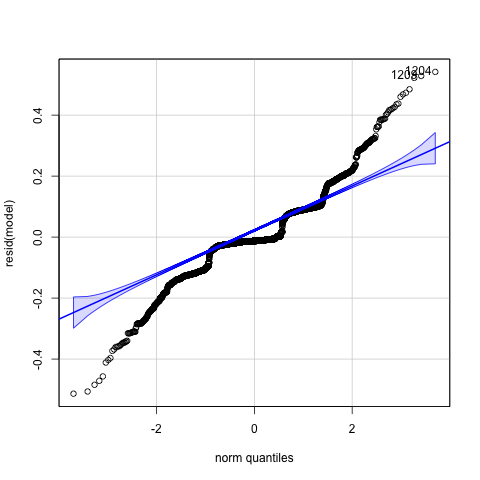

In [61]:
%%R
anova(model)
plot(model)

ranef(model)
## QQ-plots:
# par(mfrow = c(1, 2))
# qqnorm(ranef(model)$subjects[, 1], main = "Random effects of subjects")
# qqnorm(resid(model), main = "Residuals")

qqPlot(resid(model), distribution = "norm")

## count of error - number of optimal solutions

<IPython.core.display.Javascript object>


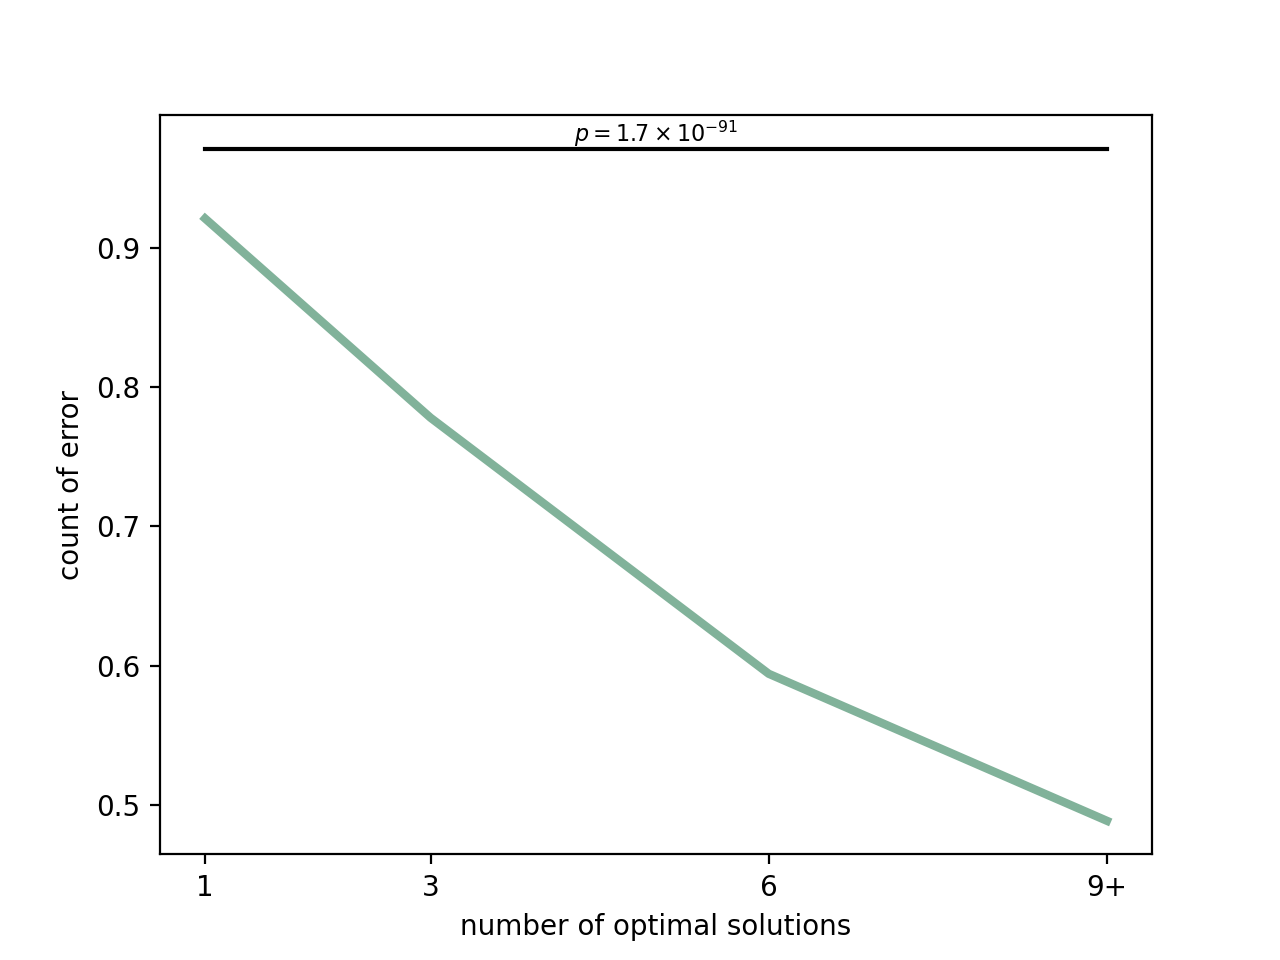

In [19]:
error_basic = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numError']) 
# error_undo = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numError']) 

n_optimal = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['nos'])

bins1 = stats.binned_statistic(n_optimal, error_basic, 'mean', bins=[1,3,6,9,100])
# bins2 = stats.binned_statistic(n_optimal, error_undo, 'mean', bins=[1,3,6,9,15])

fig, axs = plt.subplots()         
axs.plot(bins1[1][:-1], bins1[0], color = '#81b29a', linewidth=3,label='basic')
# axs.plot(bins2[1][:-1], bins2[0],linewidth=3,label='undo')

# non-parametric version of anova (because number of observations is different: https://www.reneshbedre.com/blog/anova.html)
# Kruskal-Wallis Test
stat1, p1 = stats.kruskal(error_basic[(n_optimal<3) & (n_optimal>=1)], error_basic[(n_optimal<6) & (n_optimal>=3)], error_basic[(n_optimal<9) & (n_optimal>=6)],error_basic[n_optimal>=9])
x1, x2 = 1,9
y, h, col = bins1[0][0] + 0.05, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

axs.set_xlabel('number of optimal solutions')
axs.set_ylabel('count of error')
axs.set_xticks([1,3,6,9])
axs.set_xticklabels([1,3,6,'9+'])
# axs.legend()
fig.savefig(out_dir + 'error_optimal.png', dpi=600, bbox_inches='tight')
